## Time series

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
data = pd.read_excel('/content/DatasetFullYearNumeric.xlsx')
data = data.loc[(data['Insect'] ==1)]
print (data.head())
print ('\n Data Types:')
print(data.dtypes)

    Insect       Date  Crop  ...  Sunlight  Egg Hatch  Infestation
0        1 2020-06-01     0  ...         5          0            0
3        1 2020-06-02     0  ...        10          0            0
6        1 2020-06-03     0  ...         9          0            0
9        1 2020-06-04     0  ...         8          1            0
12       1 2020-06-05     0  ...        10          0            0

[5 rows x 14 columns]

 Data Types:
Insect                        int64
Date                 datetime64[ns]
Crop                          int64
Temperature                   int64
Number of Insects             int64
Season                        int64
Humidity                      int64
Location                      int64
Crop Habitat                  int64
Wind                          int64
Rain                          int64
Sunlight                      int64
Egg Hatch                     int64
Infestation                   int64
dtype: object


In [ ]:
from datetime import datetime
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index
print(data)

            Insect  Crop  Temperature  ...  Sunlight  Egg Hatch  Infestation
Date                                   ...                                  
2020-06-01       1     0            0  ...         5          0            0
2020-06-02       1     0            1  ...        10          0            0
2020-06-03       1     0            2  ...         9          0            0
2020-06-04       1     0            2  ...         8          1            0
2020-06-05       1     0            2  ...        10          0            0
...            ...   ...          ...  ...       ...        ...          ...
2024-06-26       1     0            1  ...        14          0            0
2024-06-27       1     0            2  ...        13          0            0
2024-06-28       1     0            1  ...        10          0            1
2024-06-29       1     0            0  ...         6          0            0
2024-06-30       1     0            2  ...        10          0            0

In [ ]:
#convert to time series:
ts = data['Number of Insects']
ts.head(10)

Date
2020-06-01     8
2020-06-02    12
2020-06-03    10
2020-06-04    17
2020-06-05    13
2020-06-06    18
2020-06-07    26
2020-06-08    27
2020-06-09    35
2020-06-10    11
Name: Number of Insects, dtype: int64

In [ ]:
#1. Specific the index as a string constant:
ts['2020-07-20']

18

In [ ]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2020,8,20)]

9

In [ ]:
#1. Specify the entire range:
ts['2020-6-20':'2020-8-20']

Date
2020-06-20    18
2020-06-21    20
2020-06-22     9
2020-06-23    11
2020-06-24    26
              ..
2020-08-16     7
2020-08-17     7
2020-08-18    12
2020-08-19    24
2020-08-20     9
Name: Number of Insects, Length: 62, dtype: int64

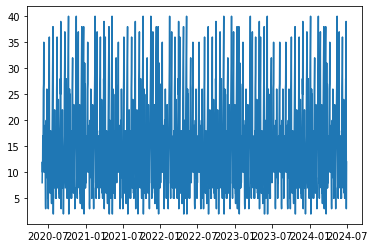

In [ ]:
#2. Use ':' if one of the indices is at ends:
ts[:'2020-08']
plt.plot(ts)

In [ ]:
#All rows of 2020-08:
ts['2020']

Date
2020-06-01     8
2020-06-02    12
2020-06-03    10
2020-06-04    17
2020-06-05    13
              ..
2020-12-27     7
2020-12-28    15
2020-12-29    27
2020-12-30     7
2020-12-31     9
Name: Number of Insects, Length: 214, dtype: int64

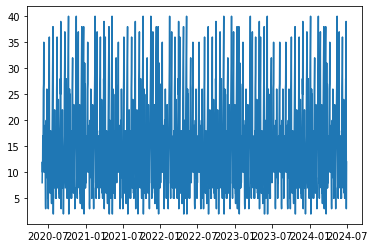

In [ ]:
plt.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


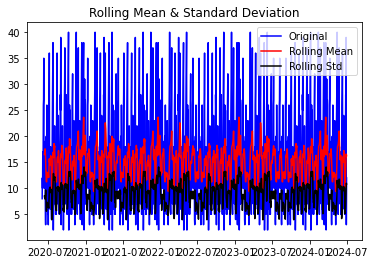

Results of Dickey-Fuller Test:
Test Statistic                -9.625680e+00
p-value                        1.663166e-16
#Lags Used                     2.300000e+01
Number of Observations Used    1.467000e+03
Critical Value (1%)           -3.434815e+00
Critical Value (5%)           -2.863512e+00
Critical Value (10%)          -2.567820e+00
dtype: float64


In [ ]:
test_stationarity(ts)

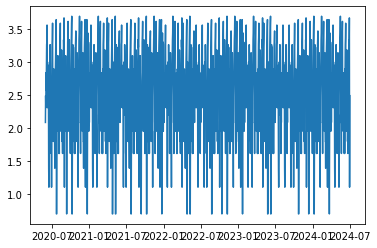

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

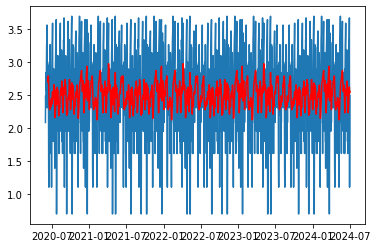

In [ ]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2020-06-01         NaN
2020-06-02         NaN
2020-06-03         NaN
2020-06-04         NaN
2020-06-05         NaN
2020-06-06         NaN
2020-06-07         NaN
2020-06-08         NaN
2020-06-09         NaN
2020-06-10         NaN
2020-06-11         NaN
2020-06-12   -0.394342
Name: Number of Insects, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Date
2020-06-12   -0.394342
2020-06-13   -0.245809
2020-06-14   -0.245809
2020-06-15    0.160235
2020-06-16   -0.270271
Name: Number of Insects, dtype: float64

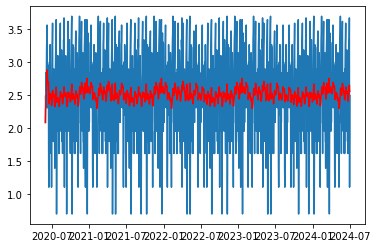

In [ ]:
expwighted_avg =ts_log.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


In [ ]:
ts_log_diff.isnull().sum()

1

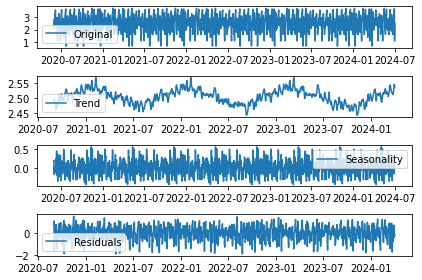

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq =181)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()